In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [0]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2008-01-01', end='2020-01-01')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,28.608572,27.507143,28.467142,27.834286,269794700.0,24.161295
2008-01-03,28.198572,27.527143,27.915714,27.847143,210516600.0,24.172449
2008-01-04,27.571428,25.555714,27.350000,25.721428,363958000.0,22.327251
2008-01-07,26.228571,24.318571,25.892857,25.377142,518048300.0,22.028393
2008-01-08,26.065714,24.400000,25.734285,24.464285,380954000.0,21.235991
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,283.596924
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.223602
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,289.113831


In [0]:
df1 = df['Adj Close']
#df1 = df.Close.resample('W').mean()
df1

Date
2008-01-02     24.161295
2008-01-03     24.172449
2008-01-04     22.327251
2008-01-07     22.028393
2008-01-08     21.235991
                 ...    
2019-12-24    283.596924
2019-12-26    289.223602
2019-12-27    289.113831
2019-12-30    290.829773
2019-12-31    292.954712
Name: Adj Close, Length: 3021, dtype: float64

In [0]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df1, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                    1.734523
p-value                           0.998210
#Lags Used                       29.000000
Number of Observations Used    2991.000000
Critical Value (1%)              -3.432538
Critical Value (5%)              -2.862507
Critical Value (10%)             -2.567285
dtype: float64


No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

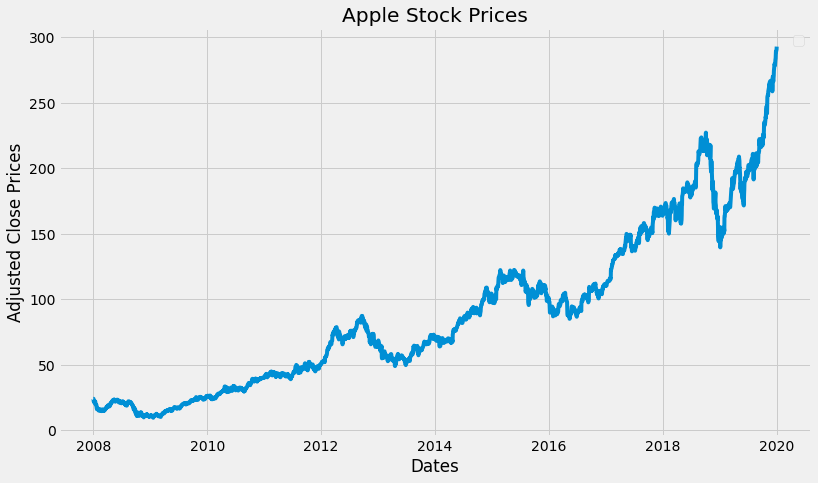

In [0]:
plt.figure(figsize=(12,7))
plt.title('Apple Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Adjusted Close Prices')
plt.legend()
plt.plot(df1)
plt.show

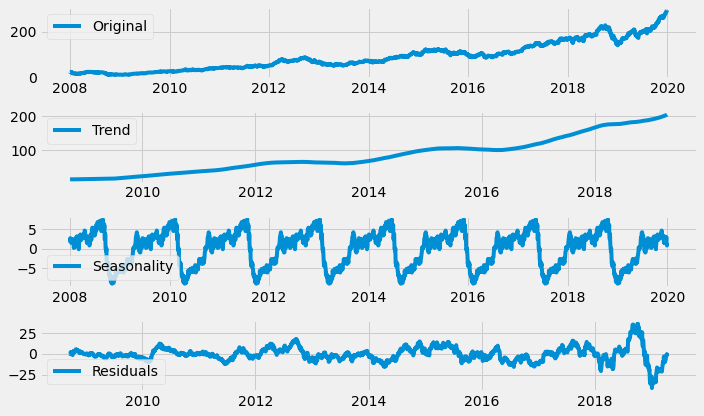

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1, freq=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

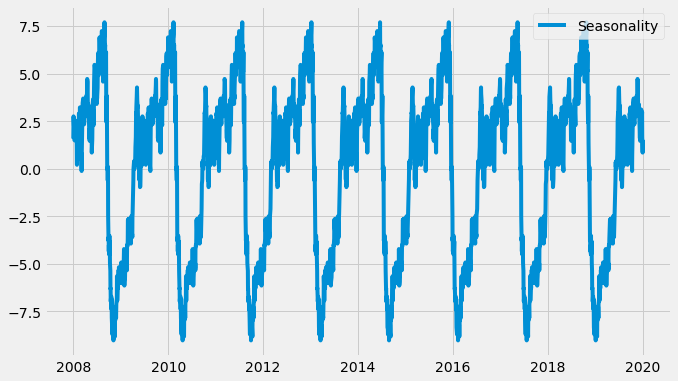

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df1,model='additive',freq=365)
seasonal = decomposition.seasonal
#plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

In [0]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 2.7MB/s 


In [0]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df1, star1t_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 1)x(0, 0, 1, 12) (constant=True); AIC=11765.051, BIC=11801.127, Time=14.276 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 12) (constant=True); AIC=13822.337, BIC=13834.362, Time=0.081 seconds
Fit ARIMA: (1, 2, 0)x(1, 0, 0, 12) (constant=True); AIC=13073.106, BIC=13097.157, Time=1.909 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 1, 12) (constant=True); AIC=11768.937, BIC=11792.988, Time=9.990 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 12) (constant=False); AIC=13820.337, BIC=13826.350, Time=0.065 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 12) (constant=True); AIC=11763.855, BIC=11793.918, Time=6.748 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 1)x(1, 0, 1, 

In [0]:
stepwise_model

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

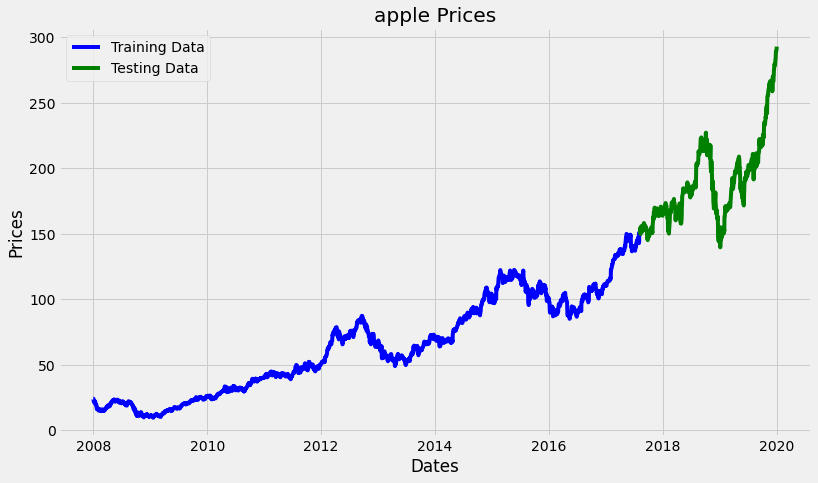

In [0]:
train_data= df1[0:int(len(df1)*0.8)]
test_data = df1[int(len(df1)*0.8):]

plt.figure(figsize=(12,7))
plt.title('apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')
plt.legend()

In [0]:
train_data

Date
2008-01-02     24.161295
2008-01-03     24.172449
2008-01-04     22.327251
2008-01-07     22.028393
2008-01-08     21.235991
                 ...    
2017-07-31    142.942078
2017-08-01    144.210724
2017-08-02    151.024796
2017-08-03    149.515900
2017-08-04    150.303986
Name: Adj Close, Length: 2416, dtype: float64

In [0]:
test_data

Date
2017-08-07    152.629822
2017-08-08    153.850388
2017-08-09    154.792236
2017-08-10    149.861832
2017-08-11    151.945938
                 ...    
2019-12-24    283.596924
2019-12-26    289.223602
2019-12-27    289.113831
2019-12-30    290.829773
2019-12-31    292.954712
Name: Adj Close, Length: 605, dtype: float64

In [0]:
stepwise_model.fit(train_data)

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [0]:
future_forecast = stepwise_model.predict(n_periods=len(test_data))

In [0]:
future_forecast

array([150.44844828, 150.53803845, 150.64011353, 150.74350662,
       150.84670385, 150.94991406, 151.05317077, 151.15647013,
       151.2598114 , 151.36319465, 151.4666199 , 151.57008716,
       151.67359641, 151.77714766, 151.88074091, 151.98437616,
       152.08805341, 152.19177265, 152.2955339 , 152.39933714,
       152.50318238, 152.60706963, 152.71099887, 152.81497011,
       152.91898334, 153.02303858, 153.12713582, 153.23127505,
       153.33545628, 153.43967951, 153.54394475, 153.64825197,
       153.7526012 , 153.85699243, 153.96142566, 154.06590088,
       154.1704181 , 154.27497733, 154.37957855, 154.48422177,
       154.58890699, 154.6936342 , 154.79840342, 154.90321464,
       155.00806785, 155.11296306, 155.21790027, 155.32287948,
       155.42790069, 155.5329639 , 155.63806911, 155.74321631,
       155.84840552, 155.95363672, 156.05890992, 156.16422512,
       156.26958232, 156.37498152, 156.48042272, 156.58590592,
       156.69143111, 156.7969983 , 156.9026075 , 157.00

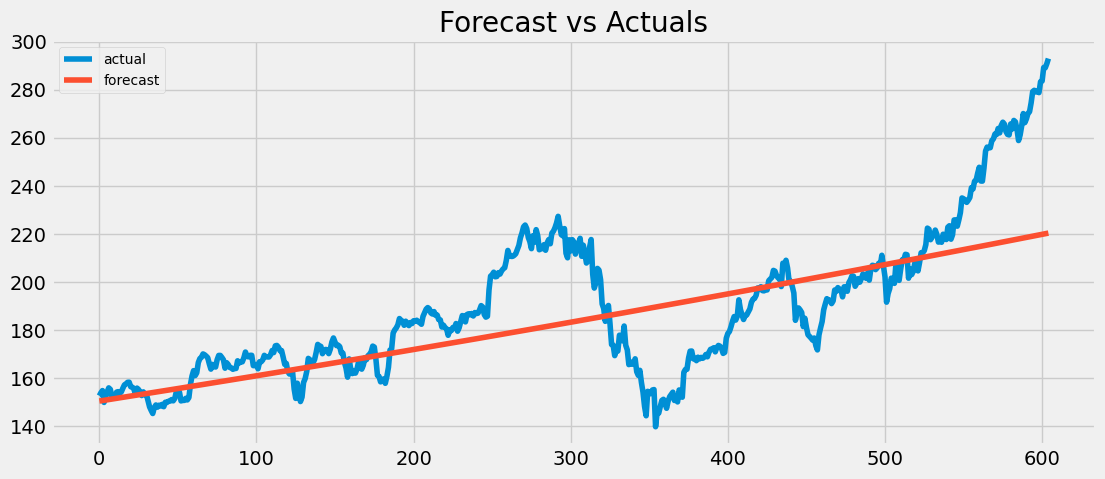

In [0]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_data, label='training')
plt.plot(test_data.values, label='actual')
plt.plot(future_forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [0]:
result = pd.DataFrame(columns=['test', 'predicted'])

result['test'] = test_data
result['predicted'] = future_forecast

In [0]:
result

,test,predicted
Date,,
2017-08-07,152.629822,150.448448
2017-08-08,153.850388,150.538038
2017-08-09,154.792236,150.640114
2017-08-10,149.861832,150.743507
2017-08-11,151.945938,150.846704
...,...,...
2019-12-24,283.596924,219.809802
2019-12-26,289.223602,219.938048
2019-12-27,289.113831,220.066337


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    
    rmse = math.sqrt(mean_squared_error(test_data, future_forecast))  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'MAPE':mape, 'RMSE':rmse,'Correlation':corr})
forecast_accuracy(future_forecast, test_data)


    #mins = np.amin(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #maxs = np.amax(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    #me = np.mean(forecast - actual)             # ME
    #mae = np.mean(np.abs(forecast - actual))    # MAE
    #mpe = np.mean(np.abs(future_forecast - test_data)/np.abs(test_data))   # MPE
                      # ACF1
    
    #return({'mape':mape, 'me':me, 'mae': mae, 
     #       'mpe': mpe, 'rmse':rmse, 
     #       'corr':corr, 'minmax':minmax})

{'Correlation': 0.7437013557505916,
 'MAPE': 0.08034745842315415,
 'RMSE': 21.887124728811614}

In [0]:
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
#from math import sqrt

# report performance
#mse1 = mean_squared_error(test_data, future_forecast)
#print('MSE: '+str(mse1))
#mae1 = mean_absolute_error(test_data, future_forecast)
#rint('MAE: '+str(mae1))
#rmse1 = math.sqrt(mean_squared_error(test_data, future_forecast))
#print('RMSE: '+str(rmse1))
#mape1 = np.mean(np.abs(future_forecast - test_data)/np.abs(test_data))
#print('MAPE: '+str(mape1))

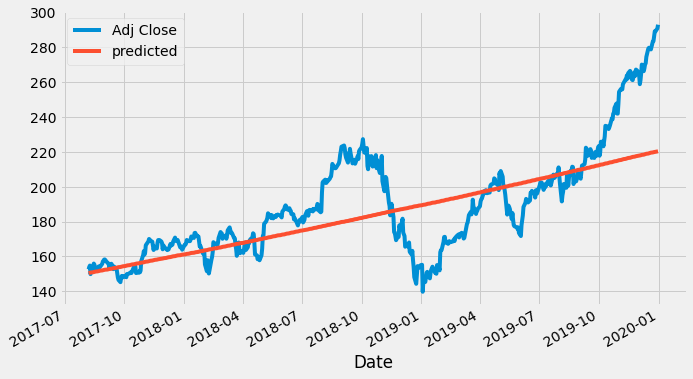

In [0]:
pd.concat([test_data,result['predicted']], axis=1).plot()

In [0]:
future_forecast2 = future_forecast

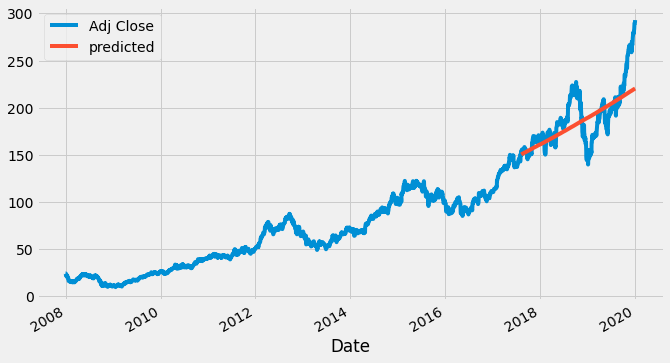

In [0]:
pd.concat([df1,result['predicted']], axis=1).plot()